### Table of Contents
1. [Introduction](#introduction)
    - [Objective of Analysis](#objective)
2. [Overview of the Data](#inspect-data)
    - [Load Libraries and Dataset](#load)
    - [Shape of the Dataset](#shape)
    - [Inspect the Column Names](#column)
    - [Data Info](#info)
3. [Basic Statistics](#basic_stats)
4. [Handling Missing Values and Duplicate Entries](#handling)
5. [Data Cleaning and Preprocessing](#cleaning)
    - [Column Name Formatting](#column_format)
    - [Converting Data Types](#converting)
6. [Exploratory Data Analysis and Visualization](#EDA)
    - [Average, Grade, and Status Columns](#new_columns)
    - [Distribution of Grades by Gender](#grade_gender)
    - [Distribution of Subjects and Average Score](#distribution)
    - [Distribution of Passed vs Failed Students](#pass_fail)
    - [Analysis by:](#analysis)
        - [Gender](gender)
        - [Race/Ethnicity](#analysis_race)
        - [Parental Level of Education](#analysis_parent)
        - [Lunch](#analysis_lunch)
        - [Test Preparation Course](#analysis_test)
7. [Advanced Analysis](#advanced_analysis)
    - [Correlation](#corr)
    - [Hypothesis Testing](#hypothesis)
8. [Exploratory Data Analysis Conclusion](#conclusion)
9. [Predicting Passed or Failed using Machine Learning](#ml)
    - [Data Preprocessing](#preprocess)
    - [Machine Learning Model Implementation](#machine)
       - [k-Nearest Neighbors (KNN) (Classification)](#knn)
       - [Decision Tree (Classification)](#tree)
       - [Logistic Regression](#logic)
       - [Naive Bayes (GaussianNB)](#naive)
       - [Kernelized Support Vector Machines](#support)
    - [Model Performance Comparison](#model)

# <span id = "introduction" style = "color:green;">1.Introduction</span>

The Students Performance dataset offers comprehensive insights into academic achievements across subjects like Math, Reading, and Writing. Alongside, it encompasses additional attributes that enable analysis of the influence of factors such as gender and race/ethnicity on student performance.

For the analysis, we will consider a passing grade of C+ and above as an overall indicator of student success. This approach allows us to evaluate the proportion of students who meet or exceed the minimum passing threshold and investigate potential associations between various attributes and academic outcomes.

## Objective of Analysis<a id = "objective"></a>

The main objective of analyzing the Students Performance dataset is to identify how predefined factors impact student performance and provide recommendations for improving overall academic achievement.

# <span id = "inspect-data" style = "color:green;">2. Overview of the Data</span>

## <a id = "load">Load Libraries and Dataset</a>

In [1]:
# Data manipulation
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency
from scipy.stats import randint

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp

# Machine Learning
from sklearn.model_selection import train_test_split
 # Classification Models     
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

 # Model Tuning 
from sklearn.model_selection import GridSearchCV, cross_val_score

 # Scaling and Encoding
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler, LabelEncoder,OrdinalEncoder

 # Model Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
 # Hyperparameter Tuning 
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV


In [2]:
# load and inspect the dataset
students_df = pd.read_csv("/kaggle/input/students-performance-in-exams/StudentsPerformance.csv")
students_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Upon a quick examination of the dataset, it becomes apparent that it consists of 8 rows. Among these rows, 5 entries pertain to categorical data, while 3 entries represent numerical data.

## <a id = "shape">Shape of the Data</a>

In [3]:
df_shape = students_df.shape
print(f"Columns:{df_shape[1]}\nRows:{df_shape[0]}")

Columns:8
Rows:1000


The dataset has a total of 8 columns and 1000 rows

## <a id = "column">Inspect Column Names</a> 
The column names are examined to gain insight into the various features present in the dataset. This allows us to understand the different variables or attributes that have been collected for each observation in the data. By inspecting the column names, we can identify the nature of the data, such as whether they are categorical (e.g., gender, race/ethnicity) or numerical (e.g., math_score, reading_score, writing_score). This initial exploration of the column names is crucial for guiding further data analysis and understanding the overall structure of the dataset.

In [4]:
students_df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

<h3 style="text-align: center;">Column Information</h3>

| Column Name | Description |
|-------------|-------------|
| gender        | The gender of the student (male/female) |
| race/ethnicity         | The race/ethnicity of the student |
| parental level of education      | The education level of the student's parent |
| lunch       | Whether the student has opted for standard or the free/reduced lunch offer|
| test preparation course  | Whether a student has completed the test preperation course or not |
| math score | The student's score achieved in math|
| reading score | The student's score achived in reading|
| writing score | The student's score achived in writing|


N/B Inspecting column names provides insight into the dataset's features, facilitating understanding of variables and their types (categorical or numerical). Valuable for guiding further analysis, but not essential for large datasets with numerous columns.

## <a id = "info">Data Info</a>

In [5]:
students_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Based on the information gathered, it is evident that the dataset is complete, containing no missing values. Additionally, there are five categorical columns and three numerical columns present in the data as observed earlier.

## <span style = "color:green" id = "basic_stats">3. Basic Statistics</span>

In [6]:
students_df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


It is interesting to observe that the means of the three subjects (math, reading, and writing scores) are relatively close together, along with their standard deviations. This proximity in the mean values suggests that, on average, the performance of students in all three subjects is similar. The small differences in the means and standard deviations may indicate that the overall academic performance among the students is relatively consistent across these subjects.

In [7]:
students_df.describe(include = "object")

,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


Frequent Occurrence: The most frequent occurrences in each categorical column are as follows:

- "gender": "female" appears most frequently among the genders.
- "race/ethnicity": "group C" is the most frequent racial/ethnic category.
- "parent_education": "some college" occurs most frequently among parent education levels.
- "lunch": "standard" is the most common type of lunch provided to students.
- "test_prep": "none" is the most frequent test preparation category.

## <span style = "color:green" id = "handling">4. Handling Missing Values and Duplicate Entries</span>

In [8]:
print(f"Number of Duplicated rows: {students_df.duplicated().sum()}")

Number of Duplicated rows: 0


Based on our previous observations, the dataset is complete, containing no missing values, and, as a result, there is no need to handle any non-existent missing values. Additionally, we did not identify any duplicated entries, indicating that each row in the dataset represents a unique observation. This cleanliness of the data simplifies further analysis and ensures a reliable foundation for exploration and modeling.

## <span style = "color:green" id = "cleaning">5. Data Cleaning and Preprocessing</span>

## <a id = "column_format">Column Name Formatting</a>
We will proceed by renaming the column names to achieve a more concise and consistent labeling for the dataset.

In [9]:
# renaming the columns 
students_df.rename(columns={"parental level of education": "parent_education", 
                   "test preparation course": "test_prep",
                   "math score": "math_score", 
                   "reading score":"reading_score", 
                   "writing score": "writing_score"}, 
                    inplace=True)

In [10]:
# inspect the columns
students_df.columns

Index(['gender', 'race/ethnicity', 'parent_education', 'lunch', 'test_prep',
       'math_score', 'reading_score', 'writing_score'],
      dtype='object')

## <a id = "converting"> Converting Data Types</a>

In [11]:
# change the datatypes of the first 5 rows to category datatype

def changeCategory(*args, dataframe = students_df):
    # place column names into a list
    myColumns = list(args)

    # use a for loop to change column data types one by one 
    for e in myColumns:
        dataframe[e] = dataframe[e].astype("category")

changeCategory("gender","race/ethnicity","parent_education", "test_prep","lunch")


In [12]:
students_df.dtypes

gender              category
race/ethnicity      category
parent_education    category
lunch               category
test_prep           category
math_score             int64
reading_score          int64
writing_score          int64
dtype: object

The categorical columns (the first 5 columns) have been converted from the object datatype to the category datatype for several reasons:

- Memory Optimization: The category datatype in pandas is more memory-efficient compared to the object datatype.
- Label Consistency: Converting categorical columns to the category datatype ensures consistent labeling of categories.
- Categorical-Specific Operations: The category datatype enables specific operations tailored for categorical data. It allows for efficient sorting, grouping, and other operations that take advantage of the inherent nature of categorical variables.

## <span style = "color:green" id = "EDA"> 6. Exploratory Data Analysis and Visualization </span>

The main objective of the analysis is to explore the relationship between different features in the dataset and the academic performance of students across all three subjects (math, reading, and writing). This examination aims to identify any significant associations or patterns that may exist between the features and the students' overall performance.

## <a id = "new_columns">Average, Grade, and Status Columns</a>

A new column called "average_score" will be added to store the mean score calculated for each student across math, reading, and writing subjects. Another column named "grade" will be introduced to assign a grade to each student based on their average scores. Lastly, a "status" column will indicate if a student passed or failed, determined by a passing grade threshold.

The grading system that will be utilized to assign grades to the students is as follows.

<h3 align = "center">Grading System<h3>
  
| Grade | Score |
|-------|-------|
| A+    | >=90  |
| A     | 85-89 |
| A-    | 80-84 |
| B+    | 75-79 |
| B     | 70-74 |
| B-    | 65-69 |
| C+    | 60-64 |
| C     | 55-59 |
| C-    | 50-54 |
| D+    | 45-49 |
| D     | 40-44 |
| D-    | 35-39 |
| F     | <35   |

In [13]:
# create a new column called average_score 
students_df["average_score"] = round((students_df["math_score"] + students_df["reading_score"]+ students_df["writing_score"])/3,1)
students_df["average_score"].head()

0    72.7
1    82.3
2    92.7
3    49.3
4    76.3
Name: average_score, dtype: float64

In [14]:
students_df["average_score"].head(2)

0    72.7
1    82.3
Name: average_score, dtype: float64

"average_score" created

In [15]:
# create a grade column that contains the grade of students according to average score
def grade_system(score):
    if score >= 90: return "A+"
    elif score >= 85: return "A"
    elif score >= 80: return "A-"
    elif score >= 75: return "B+"
    elif score >= 70: return "B"
    elif score >= 65: return "B-"
    elif score >= 60: return "C+"
    elif score >= 55: return "C"
    elif score >= 50: return "C-"
    elif score >= 45: return "D+"
    elif score >= 40: return "D"
    elif score >= 35: return "D-"
    else: return "F"
    
students_df["grade"] = students_df["average_score"].apply(grade_system)

In [16]:
students_df["grade"].head(2)

0     B
1    A-
Name: grade, dtype: object

"grade" column created

In [17]:
# creating a status column
students_df["status"] = students_df["average_score"].map(lambda x: "Passed" if x>=60 else "Failed")
students_df["status"].head(2)

0    Passed
1    Passed
Name: status, dtype: object

## <a id = "grade_age">Distribution of Grades by Gender<a/>

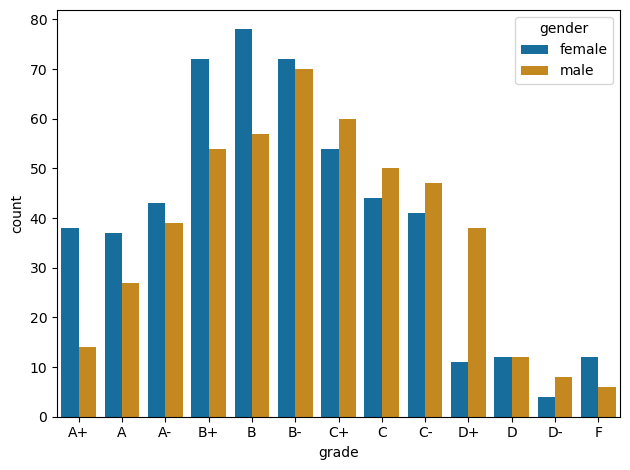

In [18]:
grade_count = students_df["grade"].value_counts()
x_grade_count = grade_count.index
y_grade_count = grade_count.values

sns.set_palette("colorblind")
sns.countplot(x = "grade", 
              hue = "gender", 
              data = students_df, 
              order = ["A+", "A", "A-", "B+", "B", "B-", "C+", "C", "C-", "D+", "D", "D-", "F"],)
plt.tight_layout()
plt.show()

## <a id = "distribution">Distribution of Subjects and Average Score</a>

Text(0.5, 1.0, 'Subject and Average Score Distribution')

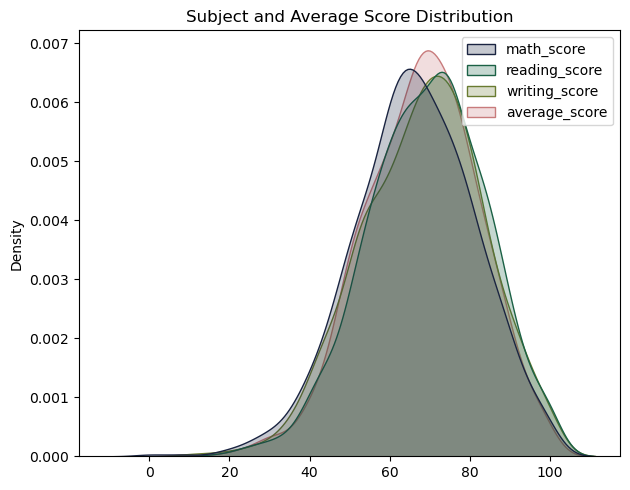

In [19]:
sns.set_palette("cubehelix")


sns.kdeplot(data = students_df, fill = True)

plt.tight_layout()
plt.title("Subject and Average Score Distribution")

The three subjects' average scores are displaying similar distributions in terms of shape and overall appearance, which can be attributed to the fact that they follow a normal distribution. The mean and standard deviation of these subjects are relatively close to each other, as revealed in the basic statistics section. This proximity in their central tendency and variability contributes to the similarity observed in their distributions.

## <a id = "pass/fail">Distribution of Passed vs Failed Students.</a>

In [20]:
passed_failed = students_df["status"].value_counts()
values = passed_failed.values
labels = passed_failed.index

fig = px.pie(names = labels, values = values)
fig.show()

Out of the total number of students, 715 students achieved a passing grade, which accounts for 71.5% of the total. On the other hand, 285 students, comprising 28.5% of the total, did not reach the passing grade (C+).

## <a id = "cat">Univariate and Multivariate Analysis</a>
Performing both multivariate and univariate analyses on various categorical columns and their relationship with subject scores and average scores.

In [21]:
# UNIVARIATE ANALYSIS

# create a function that returns a pie chart and a bar chart for the data column
def visualizeColumns(column, chartTitle,df = students_df):
    
    # labels and values 
    col_label = df[column].value_counts().index
    col_value = df[column].value_counts().values
    
    # pie and bar chart
    pie_fig = px.pie(
        names = col_label, 
        values = col_value)
    bar_fig = px.bar(
        x = col_label, 
        y = col_value)
    
    # subplot object
    fig = sp.make_subplots(
        rows = 1,
        cols = 2,
        specs = [[{"type":"xy"},{"type":"domain"}]])
    
    # add trace 
    fig.add_trace(bar_fig["data"][0], row = 1, col = 1)
    fig.add_trace(pie_fig["data"][0], row = 1, col = 2)
    
    # layout
    fig.update_layout(
        title = f"{chartTitle}",
        template = "plotly_white",
        title_x = 0.5,
        width = 600
    )
    
    # show figure
    fig.show()
    

# MULTIVARIATE ANALYSIS

# compares performance in each subject according to some category
def performance_categorically(column, chart_title,df = students_df):
    # The data is grouped based on a specific category, 
    # and the average performance for each subject is 
    # calculated within each category.  
    grouped_category = students_df.pivot_table(
        index = column,
        values = ["math_score","reading_score","writing_score"],
        aggfunc = "mean"
    ).reset_index()
    
    # melt the data for easy graphing
    melted_category = pd.melt(
        grouped_category,
        id_vars = [column], 
        value_vars=["math_score","reading_score","writing_score"],
        value_name="mean_score", 
        var_name="subject"
    ).sort_values(by="mean_score", ascending=False)
    
    # plot the data
    fig = px.bar(
        x="subject", 
        y="mean_score", 
        data_frame = melted_category,
        color=column)

    # set the bar mode to prevent stacking
    fig.update_layout(
        barmode = "group",
        title = f"{chart_title}",
        title_x = 0.5,
        width = 600
    )

    # show the figure
    fig.show()
    
# average score comparison 
def average_score_comparison(column, chart_title, df = students_df):
    # group the data by category
    grouped_data = df.groupby(column)["average_score"].mean().reset_index().sort_values(by="average_score", ascending=False)
    
    fig = px.bar(
        x = column, 
        y = "average_score",
        data_frame = grouped_data,
        width = 600
    )
    
    fig.update_layout(
        title = f"{chart_title}",
        title_x = 0.5
    )
    
    fig.show()
    

# mean across subjects per category table
def column_performance_table(column, df = students_df):
        grouped_category = students_df.pivot_table(
        index = column,
        values = ["math_score","reading_score","writing_score","average_score"],
        aggfunc = "mean").reset_index()
        return grouped_category
    
# sunburst chart to show the pass and fail proportion
# in each category
def sunburst_chart(column, chart_title,df = students_df):
    # aggregate data to get counts of each combination 
    # of column and status
    count_df = df.groupby([column, "status"]).size().reset_index(name = "count")
    
    # Calculate the percentages
    total = count_df["count"].sum()
    count_df["Percentage"] = 100*(count_df["count"]/100)

    
    # Create the sunburst chart
    fig = px.sunburst(count_df, path = [column, "status"], values = "Percentage")
    
    fig.update_traces(textinfo='label+percent parent')
    
    fig.update_layout(
        title = chart_title,
        title_x = 0.5
    )
    
    fig.show()
    
    

In [22]:
students_df.columns

Index(['gender', 'race/ethnicity', 'parent_education', 'lunch', 'test_prep',
       'math_score', 'reading_score', 'writing_score', 'average_score',
       'grade', 'status'],
      dtype='object')

## <a id = "analysis">Analysis by:</a>

### <a id = "analysis_gender">Gender</a>
The "gender" column includes categories for both male and female.

In [23]:
column_performance_table("gender")

,gender,average_score,math_score,reading_score,writing_score
0,female,69.569498,63.633205,72.608108,72.467181
1,male,65.835685,68.728216,65.473029,63.311203


In [24]:
visualizeColumns("gender", "Gender Distribution")

The female population accounts for 51.8% of the total population, while the male population accounts for 48.2%.

Female = 518 (51.8%)

Male = 482 (48.2%)

In [25]:
performance_categorically("gender", "Performance Comparison by Gender")

In the subject of mathematics, male students displayed a superior overall performance with an average score of 68.72. However, in the subjects of reading and writing, female students exhibited better average performance with scores of 72.60 and 72.46, respectively, surpassing male students.

In [26]:
average_score_comparison("gender","Average Score Comparison by Gender")

Female students outperformed their male counterparts, with a mean score of 69.56 compared to 65.83 for male students. This difference can be attributed to the fact that female students demonstrated better performance in reading and writing subjects, giving them an advantage over male students in terms of their overall average score.

In [27]:
sunburst_chart("gender","Gender Distribution of Passed/Failed Stydents")

It becomes apparent that the performance of female students surpassed that of their male counterparts. Among the male student population of 482, only 321 students (67%) managed to pass their exams, while the remaining 161 students (33%) failed.

In contrast, out of the 518 female students, a significant majority of 394 students (76%) successfully passed their exams, while only 124 students (24%) did not succeed. This demonstrates that the female students exhibited a higher success rate compared to the male students.

### <a id = "analysis_race">Race/Ethnicity</a>
The "race/ethnicity" column consists of five races/ethnicities, namely Group A, Group B, Group C, Group D, and Group E.

In [28]:
column_performance_table("race/ethnicity")

,race/ethnicity,average_score,math_score,reading_score,writing_score
0,group A,62.988764,61.629213,64.674157,62.674157
1,group B,65.470000,63.452632,67.352632,65.600000
2,group C,67.130721,64.463950,69.103448,67.827586
3,group D,69.179389,67.362595,70.030534,70.145038
4,group E,72.748571,73.821429,73.028571,71.407143


In [29]:
visualizeColumns("race/ethnicity", "Race/Ethnicity Distribution")

Among the races/ethnicities, Group C comprises the largest proportion with 319 individuals, while Group A has the smallest proportion with 89 individuals.

In [30]:
performance_categorically("race/ethnicity", "Performance Comparison by Race/Ethnicity")
average_score_comparison("race/ethnicity","Average Score Comparison by Race/Ethnicity")

There is an interesting pattern where students belonging to race group E consistently exhibit the highest mean scores across all three subjects. They are followed by students in group D, group C, group B, and finally group A. However, it is important to note that since this is a fictional dataset, such patterns may not necessarily reflect real-world outcomes and could be considered anomalies.

In [31]:
sunburst_chart("race/ethnicity","Race/Ethnicity Distribution of Pass/Fail Status")

Although group E represents the second smallest race, comprising only 14% of the total population, they achieved a notably higher passing rate compared to other races. Out of the group E population, a significant majority of 116 individuals (83%) successfully passed their exams, while only 24 individuals (17%) failed. This indicates that despite their smaller representation in the overall population, group E students performed exceptionally well and outperformed other racial groups in terms of the passing rate.

### <a id = "analysis_parent">Parental Level of Education</a>
The "parental level of education" column, now renamed as "parent_education," contains categorical data representing the educational backgrounds of students' parents. The unique values in this column include "bachelor's degree," "some college," "master's degree," "associate's degree," "high school," and "some high school." This information provides insight into the educational attainment of the parents for each student.

In [32]:
column_performance_table("parent_education")

,parent_education,average_score,math_score,reading_score,writing_score
0,associate's degree,69.568018,67.882883,70.927928,69.896396
1,bachelor's degree,71.926271,69.389831,73.000000,73.381356
2,high school,63.099490,62.137755,64.704082,62.448980
3,master's degree,73.596610,69.745763,75.372881,75.677966
4,some college,68.473451,67.128319,69.460177,68.840708
5,some high school,65.104469,63.497207,66.938547,64.888268


In [33]:
visualizeColumns("parent_education", "Parental Level of Education Distribution")

Among the students' parents, the majority, 226 of them, which is approximately 22.6%, have either attended college or completed some college education. On the other hand, the smallest percentage belongs to students whose parents hold a master's degree, comprising only 59 students or 5.9% of the total.

In [34]:
performance_categorically("parent_education", "Performance Comparison by Parental Level of Education")
average_score_comparison("parent_education", "Average Score Comparison by Parental Level of Education")

The data shows that students whose parents hold a master's degree tend to perform better than students whose parents have other educational backgrounds. Additionally, students whose parents have a bachelor's degree exhibit the second-best overall performance. In contrast, students whose parents have only a high school education achieve the lowest performance.

These observations suggest a significant relationship between the parental level of education and the academic performance of the students. It implies that a higher level of parental education might provide an environment that fosters better learning opportunities and academic support for their children, potentially leading to improved performance in their studies. This underscores the critical role that parental education can play in influencing and shaping a student's academic achievements.

In [35]:
sunburst_chart("parent_education","Parental Level of Education Distribution of Passed/Failed Students")

The passing rate of students whose parents held advanced degrees, such as a master's degree or a bachelor's degree, was higher compared to students whose parents had other educational qualifications. 

Among the student population whose parents held master's degrees, which accounted for 6% of the total population, a majority of 49 students (83%) successfully passed their exams, while 10 students (17%) did not pass.

Similarly, students whose parents held bachelor's degrees, making up 12% of the population, exhibited a high passing rate. Out of this group, 97 students (82%) passed their exams, while 21 students (18%) did not pass.

These results indicate that students with parents who attained master's or bachelor's degrees had a higher likelihood of passing their exams compared to students whose parents held other educational qualifications.

### <a id = "analysis_lunch">Lunch</a>

The "lunch" column in this dataset contains categorical data that describes the type of lunch being offered to the students in the particular school. The two unique values in this column are:

1. "standard" - This indicates that students are offered a standard or regular lunch option.
2. "free/reduced" - This indicates that students are eligible for a free or reduced-price lunch program, which is typically provided to students from low-income families.

The lunch column provides valuable information about the socioeconomic backgrounds of the students in the school. Students receiving free or reduced-price lunches may face financial challenges, while those having standard lunches might come from relatively more financially stable households. This information can be essential for understanding the potential impact on academic performance that the two different meal plans have on students.

In [36]:
column_performance_table("lunch")

,lunch,average_score,math_score,reading_score,writing_score
0,free/reduced,62.198310,58.921127,64.653521,63.022535
1,standard,70.836279,70.034109,71.654264,70.823256


In [37]:
visualizeColumns("lunch", "Lunch Plan Distribution")


Based on the above, it is evident that a significant majority of the students, comprising 645 students or approximately 64.5%, opt for the standard lunch option. Conversely, 355 students or about 35.5% choose the free/reduced lunch program. This observation suggests that a majority of the students in this school likely come from relatively stable financial backgrounds, as they opt for the standard lunch option, which is not subsidized and requires regular payment.

In [38]:
performance_categorically("lunch", "Performance Comparison by Lunch Plan")
average_score_comparison("lunch","Average Score Comparison by Lunch Plan")

Based on the data provided, there is a clear relationship between the type of lunch plan students take and their academic performance. Students who take the "standard" lunch option tend to perform better in all three subjects, and they also have higher overall average scores compared to students who take the "free/reduced" lunch plan.

This observation suggests that there might be a link between the type of lunch plan chosen and the students' academic outcomes. While the data does not establish a causal relationship, it is possible that students who have access to the standard lunch option may come from relatively more financially stable backgrounds, which could potentially provide them with better resources and support for their education. On the other hand, students in the free/reduced lunch program might face financial challenges, which could impact their academic performance due to various socioeconomic factors.

In [39]:
sunburst_chart("lunch","Lunch Distribution of Pased/Failed Students")

Out of the total of 645 students who opted for the standard lunch, the majority of 515 students (80%) successfully passed their exams, while 130 students (20%) did not pass.

On the other hand, among the 355 students who received free or reduced lunch, 200 students (56%) passed their exams, while 155 students (44%) unfortunately did not pass.

These statistics demonstrate that a higher percentage of students who chose the standard lunch option managed to pass their exams, while a comparatively lower percentage of students who received free or reduced lunch were successful.

### <a id="analysis_test">Test Preparation Course</a>
The "test preparation course" column, now renamed as "test_prep," is a categorical column containing two categories:

1. "completed" - This category indicates that a student took and successfully completed the test preparation course offered by the school.
2. "none" - This category indicates that a student neither participated in nor completed the test preparation course.

The "test_prep" column provides information about whether students have undergone test preparation to enhance their performance in standardized tests. Students who have completed the test preparation course might have received additional support and guidance, which could potentially impact their test scores and academic achievements. On the other hand, students who did not take the test preparation course may have relied solely on their regular academic preparation for these tests. This column helps to identify any potential relationship between test preparation and students' test scores or academic performance.

In [40]:
column_performance_table("test_prep")

,test_prep,average_score,math_score,reading_score,writing_score
0,completed,72.669553,69.695531,73.893855,74.418994
1,none,65.037539,64.077882,66.534268,64.504673


In [41]:
visualizeColumns("test_prep", "Test Preparation Distribution")

It is evident that 642 students, representing approximately 64.2% of the total, neither completed nor participated in the test preparation course. Conversely, 358 students, accounting for around 35.8% of the total, did take and successfully complete the test preparation course offered by the school. This observation highlights the difference in participation rates between students who chose to undergo the test preparation program and those who did not.

In [42]:
performance_categorically("test_prep", "Performance Comparison by Test Preparation")
average_score_comparison("test_prep","Average Score Comparison by Test Preparation")

The data reveals a clear relationship between academic performance and the test preparation course. Students who took and completed the test preparation course outperformed those who did not take the course in all three subjects, and they also achieved a higher overall average score. This finding strongly suggests that participating in and completing the test preparation course positively impacts students' academic performance.

In [43]:
sunburst_chart("test_prep","Test Preparation Course Distribution of Passed/Failed Students")

Among the students who completed the test preparation course, which accounted for 358 students (36%) of the total, an impressive majority of 298 students (83%) successfully passed their exams, while only 60 students (17%) did not pass.

In contrast, out of the 642 students (64%) who did not take the test preparation course, 417 students (65%) passed their exams, while 225 students (35%) unfortunately failed.

These findings indicate that taking the test preparation course had a substantial impact on the passing rate, with a significantly higher percentage of students who completed the course achieving successful results compared to those who did not take the course.

# <span id = "advanced_analysis" style = "color:green">Advanced Analysis</span>
In this chapter, we will conduct correlation analysis and hypothesis testing to determine if there is a significant relationship between various categories or factors and students' performance. The purpose is to confirm whether such a relationship truly exists.

## <a id = "corr">Correlation</a>

In [44]:
corr_columns = ["math_score","reading_score","writing_score"]
corr_matrix = students_df[corr_columns].corr()

# heatmap
fig = px.imshow(
    corr_matrix, 
    text_auto = True,
    template = "seaborn",
    color_continuous_scale = "YlGnBu")
fig.show()

In [45]:
corr_matrix

,math_score,reading_score,writing_score
math_score,1.000000,0.817580,0.802642
reading_score,0.817580,1.000000,0.954598
writing_score,0.802642,0.954598,1.000000


Interpreting the heatmap for the Students Performance dataset:

- The correlation between math score and reading score is approximately 0.82, which is a strong positive correlation. This indicates that, in general, students who perform well in math tend to perform well in reading, and vice versa.
- The correlation between math score and writing score is approximately 0.8, which is also a strong positive correlation. This indicates that students who perform well in math generally perform well in writing as well.
- The correlation between reading score and writing score is approximately 0.95, which is an even stronger positive correlation. This indicates that students who perform well in reading are very likely to perform well in writing, and vice versa.

In summary, all these subjects are strongly positively correlated, with the strongest relationship being between Reading and Writing. This could mean that the skills required for these two subjects are more closely related than the skills required for Math and the other subjects. However, these are just correlations and do not imply causation. The actual causes behind these correlations could be much more complex and might involve other factors not included in this analysis.

## <a id = "hypothesis">Hypothesis Testing</a>
Despite conducting a correlation analysis and other exploratory analyses that indicate potential relationships between variables impacting students' performance, it is essential to ascertain whether these observed associations are statistically significant or merely a result of random chance. Therefore, conducting hypothesis testing becomes imperative. Hypothesis testing allows us to rigorously assess the probability that the identified relationships hold true in the broader population rather than being a fluke of the specific sample we have analyzed. By subjecting the data to hypothesis testing, we can determine if the observed patterns are genuinely meaningful and reliable, helping us draw more robust conclusions and make informed decisions regarding the factors influencing student performance.

Research Question: Is there a relationship between specific characteristics (categories) and the academic performance of students, specifically whether they pass or fail? We will find this out using a 0.05% significance level.

We will be utilizing a chi-square test to determine the dependence or independence between a student's passing or failing and specific categories.

In [46]:
def chi_square_test(column, column_test, df=students_df):
    # significance level
    alpha = 0.05

    # hypothesis
    H_0 = f"{column_test} and passing the exams are not related"
    H_1 = f"{column_test} and passing the exams are related"

    # obtain the contingency table
    table = pd.crosstab(df[column], df["status"])
    chi2, p_value, dof, expected = chi2_contingency(table)

    print("Expected frequencies:")
    print(expected)

    # check if each cell in the expected frequency table is at least 5
    if np.all(expected >= 5):
        print("All cells in the expected frequency table have values >= 5.")
    else:
        print("Some cells in the expected frequency table have values < 5.")

    if (p_value <= alpha):
        print(f"Since the p-value {round(p_value, 6)} is less than or equal to the significance level ({alpha}), we reject the null hypothesis (H0). This suggests that {H_1}.")
    else:
        print(f"Since the p-value {round(p_value, 6)} is greater than the significance level ({alpha}), we fail to reject the null hypothesis (H0). This suggests that {H_0}.")


In [47]:
chi_square_test("gender","Gender")

Expected frequencies:
[[147.63 370.37]
 [137.37 344.63]]
All cells in the expected frequency table have values >= 5.
Since the p-value 0.001184 is less than or equal to the significance level (0.05), we reject the null hypothesis (H0). This suggests that Gender and passing the exams are related.


In [48]:
chi_square_test("race/ethnicity","Race/Ethnicity")

Expected frequencies:
[[ 25.365  63.635]
 [ 54.15  135.85 ]
 [ 90.915 228.085]
 [ 74.67  187.33 ]
 [ 39.9   100.1  ]]
All cells in the expected frequency table have values >= 5.
Since the p-value 9.6e-05 is less than or equal to the significance level (0.05), we reject the null hypothesis (H0). This suggests that Race/Ethnicity and passing the exams are related.


In [49]:
chi_square_test("parent_education","Parental Level of Education")

Expected frequencies:
[[ 63.27  158.73 ]
 [ 33.63   84.37 ]
 [ 55.86  140.14 ]
 [ 16.815  42.185]
 [ 64.41  161.59 ]
 [ 51.015 127.985]]
All cells in the expected frequency table have values >= 5.
Since the p-value 4.4e-05 is less than or equal to the significance level (0.05), we reject the null hypothesis (H0). This suggests that Parental Level of Education and passing the exams are related.


In [50]:
chi_square_test("lunch","Lunch")

Expected frequencies:
[[101.175 253.825]
 [183.825 461.175]]
All cells in the expected frequency table have values >= 5.
Since the p-value 0.0 is less than or equal to the significance level (0.05), we reject the null hypothesis (H0). This suggests that Lunch and passing the exams are related.


In [51]:
chi_square_test("test_prep","Test Preparation Course")

Expected frequencies:
[[102.03 255.97]
 [182.97 459.03]]
All cells in the expected frequency table have values >= 5.
Since the p-value 0.0 is less than or equal to the significance level (0.05), we reject the null hypothesis (H0). This suggests that Test Preparation Course and passing the exams are related.


# <span id = "conclusion" style = "color:green">Conclusion</span>

In the context of the data analyzed, our statistical tests suggest that several factors are related to whether a student passes the exams.

1. Gender appears to have a relationship with exam success, suggesting that males and females may experience differing levels of academic achievement.
2. Racial and ethnic background also seems to be a significant factor, indicating that students from different racial or ethnic backgrounds have varying pass rates.
3. Parental level of education is also related to a student's success, suggesting that the educational attainment of a student's parents might influence their academic performance.
4. The type of lunch a student has also shown to have a relationship with passing exams. This could be a proxy for socio-economic status, as it might be related to the affordability of different types of lunches.
5. Lastly, whether or not a student completes a test preparation course appears to have a relationship with passing the exams, suggesting that these preparation courses might be effective in improving academic performance.

These findings underscore the complexity of academic achievement and the many factors that can influence it. However, it's important to remember that these relationships are statistical and don't necessarily imply causation. Further research would be needed to understand the precise nature and causes of these relationships.

# <span id = "ml" style = "color:green">Predicting Passed or Failed using Machine Learning</span>

In this section, we will employ various machine learning classification models to predict whether a student will pass or fail based on the available categories. 

However, we will not include the numerical columns (math_score, reading_score, writing_score, and average_score) in the model. This decision is based on the fact that the outcome variable (pass or fail) is directly derived from certain predictor variables (such as math_score, reading_score, and writing_score). Including these predictor variables in the model would lead to highly accurate predictions, but it may not provide meaningful insights or reflect real-world scenarios. For instance, if a student's pass/fail status is determined solely by surpassing a specific score threshold, a model incorporating these scores as features would simply replicate this predetermined rule, rather than discovering new relationships or patterns.

## <a id = "preprocessing">Data Preprocessing</a>
We will encode the categorical columns to ensure compatibility with machine learning models.

In [52]:
# get a copy of the original dataset 
ml_students_df = students_df.copy()

In [53]:
# removing unnecessary columns 
ml_students_df.drop(columns=["math_score", "reading_score",
                    "writing_score", "grade", "average_score"], inplace=True)


In [54]:
# Target Variable Mapping
status_mapping = {"Passed":0,"Failed": 1}
ml_students_df["status"] = ml_students_df["status"].map(status_mapping)

# Features Mapping 
  # gender mapping 
gender_map = {"male":0, "female": 1}
ml_students_df["gender"] = ml_students_df["gender"].map(gender_map)

  # lunch mapping
lunch_map = {"standard": 0,"free/reduced":1}
ml_students_df["lunch"] = ml_students_df["lunch"].map(lunch_map)

  # test prep mapping
test_map = {"none": 0, "completed": 1}
ml_students_df["test_prep"] = ml_students_df["test_prep"].map(test_map)

The "parent_education" column is an ordinal categorical column as it exhibits a rankable nature. For instance, "masters" represents the highest rank, while "some high school" can be considered the lowest rank. To encode these categories, we will employ the OrdinalEncoder, which is specifically designed for handling ordinal data.

In [55]:
# Define the order of categories for the 'parental level of education' column
education_order = [[
    "some high school",
    "high school",
    "some college",
    "associate's degree",
    "bachelor's degree",
    "master's degree",
]]

ordinal_encoder = OrdinalEncoder(categories=education_order)

ml_students_df["parent_education"] = ordinal_encoder.fit_transform(ml_students_df[["parent_education"]])


One hot encoding will be used for the "race/ethnicity" column due to a larger number of categories and the absence of ordinality or ranking among races. Label encoding and ordinal encoding may not be suitable approaches in this case.

In [56]:
ml_students_df = pd.get_dummies(data = ml_students_df, columns = ["race/ethnicity"])
ml_students_df

,gender,parent_education,lunch,test_prep,status,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
0,1,4.0,0,0,0,0,1,0,0,0
1,1,2.0,0,1,0,0,0,1,0,0
2,1,5.0,0,0,0,0,1,0,0,0
3,0,3.0,1,0,1,1,0,0,0,0
4,0,2.0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
995,1,5.0,0,1,0,0,0,0,0,1
996,0,1.0,1,0,1,0,0,1,0,0
997,1,1.0,1,1,0,0,0,1,0,0
998,1,2.0,0,1,0,0,0,0,1,0


In [57]:
# define the features and target variable
X = ml_students_df.drop(columns = ["status"])
y = ml_students_df["status"]

# split the data into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

"stratify" is a parameter that ensures that the distribution of the classes in the training and testing datasets is the same as the original dataset.

## <a id = "machine">Machine Learning Model Implementation</a>

To predict whether a student will pass or fail, the following machine learning classification models will be implemented:

- k-Nearest Neighbors (KNN) (Classification)
- Decision Tree (Classification)
- Logistic Regression
- Naive Bayes (GaussianNB)
- Kernelized Support Vector Machines (SVC)

To improve the performance of the classification models, hyperparameter tuning will be incorporated to find the best parameters and achieve higher model accuracy.

### <a id = "knn">k-Nearest Neighbors (KNN) (Classification)</a>

In [58]:
knn_param_grid = {"n_neighbors": range(1, 10)}

knn_cls = KNeighborsClassifier()
knn_cv = GridSearchCV(knn_cls, param_grid=knn_param_grid, cv=10)
knn_cv.fit(X_train, y_train)

# Check the Best Parameters and Best Score
print("Best Parameters: " + str(knn_cv.best_params_)) # prints the best 'n_neighbors'
print("Best Score: " + str(knn_cv.best_score_)) # best cross-validated accuracy score

Best Parameters: {'n_neighbors': 8}
Best Score: 0.7162499999999999


In [59]:
# the accuracy of the model on the training data.
knn_training_accuracy = knn_cv.score(X_train, y_train)
# the accuracy of the model on the testing data
knn_test_accuracy = knn_cv.score(X_test, y_test)

print(f"Training Accuracy: {knn_training_accuracy}")
print(f"Test Accuracy: {knn_test_accuracy}")

Training Accuracy: 0.76375
Test Accuracy: 0.715


The model demonstrates an accuracy of 76.375% on the training data, indicating that it predicts the correct outcome for 76.375% of the instances it has been trained on. On new, unseen data, the model achieves an accuracy of 71.5%, meaning it correctly predicts the outcome for 71.5% of the instances it hasn't encountered during training.

### <a id = "tree">Decision Tree (Classification)</a>

In [60]:
dc_param_grid = {"max_depth":range(1,10),"min_samples_split":range(2,10),"criterion":["gini","entropy"]}

dtc = DecisionTreeClassifier(random_state=42)
dtc_cv = RandomizedSearchCV(dtc, param_distributions =dc_param_grid, cv = 5, n_iter=50, random_state=42)
dtc_cv.fit(X_train, y_train)

# Check the Best Parameters and Best Score
print("Best Parameters: " + str(dtc_cv.best_params_))
print("Best Score: " + str(dtc_cv.best_score_)) # best cross-validated accuracy score

Best Parameters: {'min_samples_split': 5, 'max_depth': 4, 'criterion': 'gini'}
Best Score: 0.7387499999999999


I decided to use RandomizedSearchCV in this case because of the slight performance issues I was getting while using GridSearchCV.

In [61]:
# the accuracy of the model on the training data.
dtc_training_accuracy = dtc_cv.score(X_train, y_train)
# the accuracy of the model on the testing data
dtc_test_accuracy = dtc_cv.score(X_test, y_test)

print(f"Training Accuracy: {dtc_training_accuracy}")
print(f"Test Accuracy: {dtc_test_accuracy}")

Training Accuracy: 0.75
Test Accuracy: 0.715


The model exhibits a training accuracy of 75%, indicating that it correctly predicts the outcome for 75% of the instances in the training data. However, when evaluated on new, unseen data, the model achieves a test accuracy of 71.5%, meaning it accurately predicts the outcome for 71.5% of the instances it hasn't encountered during training.

### <a id = "logic">Logistic Regression</a>

In [62]:
param_grid = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l1', 'l2'], 
    'solver': ['liblinear']
}

logreg = LogisticRegression(random_state=42)
logreg_cv = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)
logreg_cv.fit(X_train, y_train)

# Check the Best Parameters and Best Score
print("Best Parameters: " + str(logreg_cv.best_params_))
print("Best Score: " + str(logreg_cv.best_score_)) # best cross-validated accuracy score

Best Parameters: {'C': 0.23357214690901212, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.7424999999999999


In [63]:
# the accuracy of the model on the training data.
logreg_training_accuracy = logreg_cv.score(X_train, y_train)
# the accuracy of the model on the testing data
logreg_test_accuracy = logreg_cv.score(X_test, y_test)

print(f"Training Accuracy: {logreg_training_accuracy}")
print(f"Test Accuracy: {logreg_test_accuracy}")

Training Accuracy: 0.75
Test Accuracy: 0.74


The model demonstrates a training accuracy of 75%, indicating that it predicts the correct outcome for 75% of the instances in the training data. When evaluated on new, unseen data, the model achieves a higher test accuracy of 74%, meaning it correctly predicts the outcome for 74% of the instances it hasn't encountered during training. This suggests that the model generalizes reasonably well to unseen data, performing slightly better on the test set compared to the training set. It indicates that the model is able to capture underlying patterns in the data and make accurate predictions.

### <a id = "naive">Naive Bayes (GaussianNB)</a>

In [64]:
nb_cls = GaussianNB()

nb_cls.fit(X_train, y_train)

GaussianNB()

In [65]:
# the accuracy of the model on the training data.
nb_training_accuracy = nb_cls.score(X_train, y_train)
# the accuracy of the model on the testing data
nb_test_accuracy = nb_cls.score(X_test, y_test)

print(f"Training Accuracy: {nb_training_accuracy}")
print(f"Test Accuracy: {nb_test_accuracy}")

Training Accuracy: 0.7175
Test Accuracy: 0.71


The model demonstrates a training accuracy of 71.75%, indicating that it correctly predicts the outcome for 71.75% of the instances in the training data. However, when evaluated on new, unseen data, the model achieves a test accuracy of 71%, meaning it accurately predicts the outcome for 71% of the instances it hasn't encountered during training. 

### <a id = "support">Kernelized Support Vector Machines</a>

In [66]:
svc_cls = SVC(random_state=42)
svc_cls.fit(X_train, y_train)

SVC(random_state=42)

In [67]:
# the accuracy of the model on the training data.
svc_training_accuracy = svc_cls.score(X_train, y_train)
# the accuracy of the model on the testing data
svc_test_accuracy = svc_cls.score(X_test, y_test)

print(f"Training Accuracy: {svc_training_accuracy}")
print(f"Test Accuracy: {svc_test_accuracy}")

Training Accuracy: 0.74875
Test Accuracy: 0.73


## <a id = "model">Model Performance Comparison</a>

In [68]:
model_map = {"Model":["KNeighborsClassifier",
                     "DecisionTreeClassifier",
                     "LogisticRegression",
                     "GaussianNB",
                     "SVC"],
           "Training Accuracy":[knn_training_accuracy,
                               dtc_training_accuracy,
                               logreg_training_accuracy,
                               nb_training_accuracy,
                               svc_training_accuracy],
           "Test Accuracy": [knn_test_accuracy,
                            dtc_test_accuracy,
                            logreg_test_accuracy,
                            nb_test_accuracy,
                            svc_test_accuracy]}
model_df = pd.DataFrame(model_map)
model_df.set_index('Model', inplace=True)

In [69]:
model_df

,Training Accuracy,Test Accuracy
Model,,
KNeighborsClassifier,0.76375,0.715
DecisionTreeClassifier,0.75000,0.715
LogisticRegression,0.75000,0.740
GaussianNB,0.71750,0.710
SVC,0.74875,0.730


Here are some insights that can be derived from the table:

1. **KNeighborsClassifier and DecisionTreeClassifier:** Both these models have a similar performance on the training dataset with an accuracy of ~76% and ~75% respectively. However, when used to predict unseen data, their accuracy drops to ~71.5%. This may suggest that the models are slightly overfitting the training data.

2. **LogisticRegression:** This model has a training accuracy of ~75%, but unlike the KNeighborsClassifier and DecisionTreeClassifier, its test accuracy increases to ~74%. This indicates a good balance between bias and variance in the model, suggesting that it's generalizing well to unseen data.

3. **GaussianNB:** This model shows the lowest training accuracy at ~71.75%, and a similar test accuracy at ~71%. It's consistent, but with room for improvement compared to the other models.

4. **SVC (Support Vector Classifier):** The SVC model exhibits a performance similar to LogisticRegression with a slight drop in test accuracy. With ~74.88% training accuracy and ~73% test accuracy, it also seems to generalize well to new data.

In conclusion, LogisticRegression and SVC seem to provide the best balance between training and testing accuracy, indicating good generalization.